In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from typing import List, Tuple, Union
from bisect import bisect_left, bisect_right, bisect
random.seed(42)

In [2]:
NUMBER_COUNT = 500
array = [random.random() * 8 for _ in range(NUMBER_COUNT)]

In [3]:
def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    if len(array) == 0:
        return ([], [])
    labels = np.linspace(min(array), max(array), num=bins + 1)
    result = [0 for _ in range(bins)]
    for x in array:
        result[min(bisect(labels, x) - 1, len(result) - 1)] += 1
    return (result, labels)

(array([48., 41., 72., 38., 49., 50., 51., 44., 56., 51.]),
 array([3.24751758e-03, 8.02348741e-01, 1.60144996e+00, 2.40055119e+00,
        3.19965241e+00, 3.99875363e+00, 4.79785486e+00, 5.59695608e+00,
        6.39605730e+00, 7.19515852e+00, 7.99425975e+00]),
 <BarContainer object of 10 artists>)

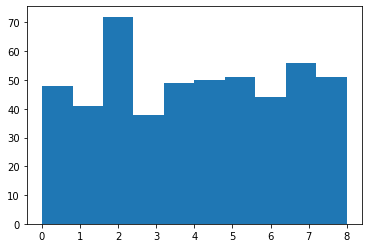

In [4]:
plt.hist(array, bins=10)

[48, 41, 72, 38, 49, 50, 51, 44, 56, 51]
[3.24751758e-03 8.02348741e-01 1.60144996e+00 2.40055119e+00
 3.19965241e+00 3.99875363e+00 4.79785486e+00 5.59695608e+00
 6.39605730e+00 7.19515852e+00 7.99425975e+00]


<BarContainer object of 10 artists>

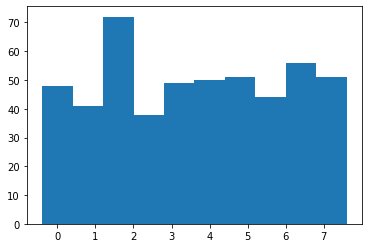

In [5]:
counts, labels = fast_hist(array, bins=10)
print(counts)
print(labels)
plt.bar(labels[:-1], counts)

4.38 ms ± 97.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


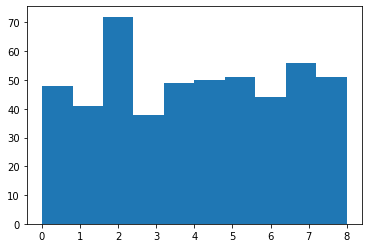

In [6]:
%%timeit
plt.hist(array, bins=10)

In [8]:
%%timeit
counts, labels = fast_hist(array, bins=10)
# plt.bar(labels[:-1], counts)

296 µs ± 3.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
